In [1]:
import pandas as pd
import numpy as np
import scipy as sp
# from scipy.sparse import csr_matrix 
# from sklearn.metrics.pairwise import cosine_similarity
import timeit
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import ClusterNode
import matplotlib.pylab as plt

In [7]:
input_path='/scratch2/esadrfa/moliere/cancer/'
linkage_file='linkage_mat_ward'

In [6]:
%%bash 
ls /scratch2/esadrfa/moliere/cancer/

abstracts.txt
allClouds.txt
Cancer_clustered_clouds.txt
dist_matrix.npy
filtered_abstracts.txt
final.labels
linkage_mat.npy
linkage_mat_ward.npy
log_runDijk2Data_cancer_093017_1224.log
log_runDijk2Data_cancer_100217_1218.log
out
sim_matrix.npy


In [8]:
start = timeit.default_timer()
Z = np.load(input_path + linkage_file + '.npy')

stop = timeit.default_timer()
print("Time: %.1f seconds" % (stop - start))

Time: 0.0 seconds


In [9]:
Z.shape

(286, 4)

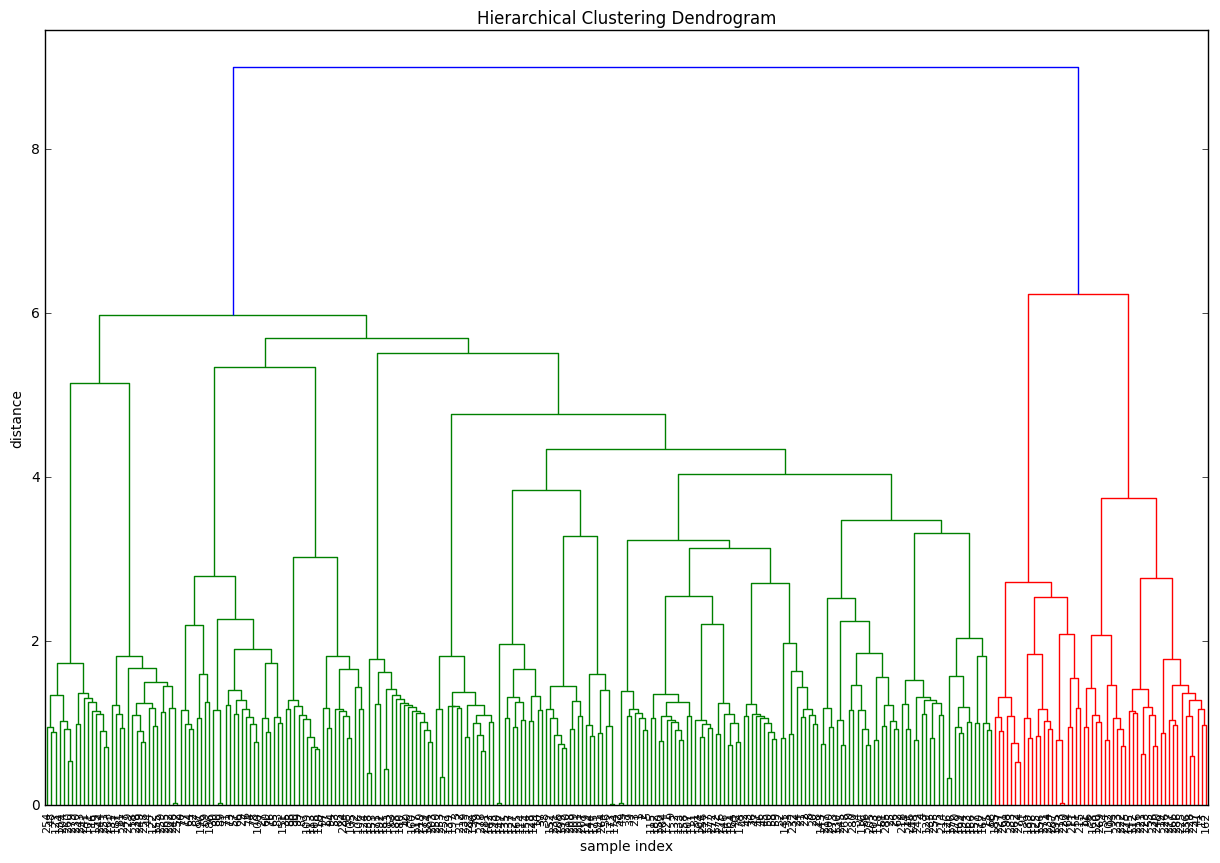

In [10]:
# calculate full dendrogram
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

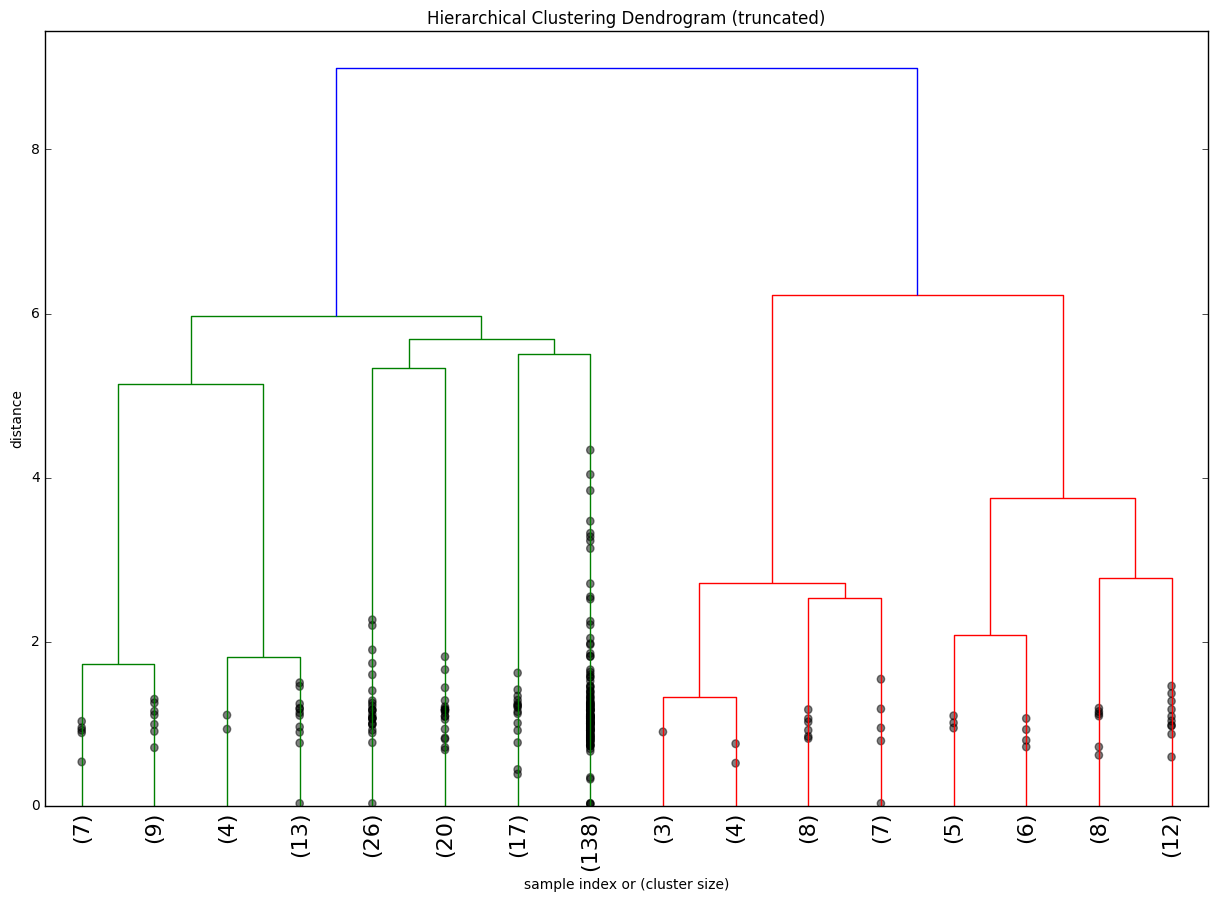

In [11]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

dendrogram(
    Z,
    truncate_mode='level',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=16.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

The above dendrogram is the one Ilya said, I need to go down one level to one up the right most cluster with 8786 point

In [ ]:
# plt.figure(figsize=(25, 15))
# plt.title('Hierarchical Clustering Dendrogram (truncated)')
# plt.xlabel('sample index or (cluster size)')
# plt.ylabel('distance')

# dendrogram(
#     Z,
#     truncate_mode='level',  # show only the last p merged clusters
#     p=5,  # show only the last p merged clusters
#     leaf_rotation=90.,
#     leaf_font_size=12.,
#     show_contracted=True,  # to get a distribution impression in truncated branches
# )
# plt.show()

In [ ]:
def llf(id):
    return str(id)


In [ ]:
def augmented_dendrogram(*args, **kwargs):

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        for i, d in zip(ddata['icoord'], ddata['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            plt.plot(x, y, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -8),
                         textcoords='offset points',
                         va='top', ha='center')

    return ddata

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

max_d1 = 190
# plt.axhline(y=max_d1, c='k')
# max_d2 = 150
# plt.axhline(y=max_d2, c='b')

ddata = dendrogram(
    Z,
    leaf_label_func=llf,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=26,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    #show_contracted=False  # to get a distribution impression in truncated branches
    
)
# icoord = sp.array( ddata['icoord'] ) #for x axis
dcoord = sp.array( ddata['dcoord'] ) #for y axis
plt.ylim(max_d1, dcoord.max()*1.1)
# ax2.set_xticks([])

plt.show()


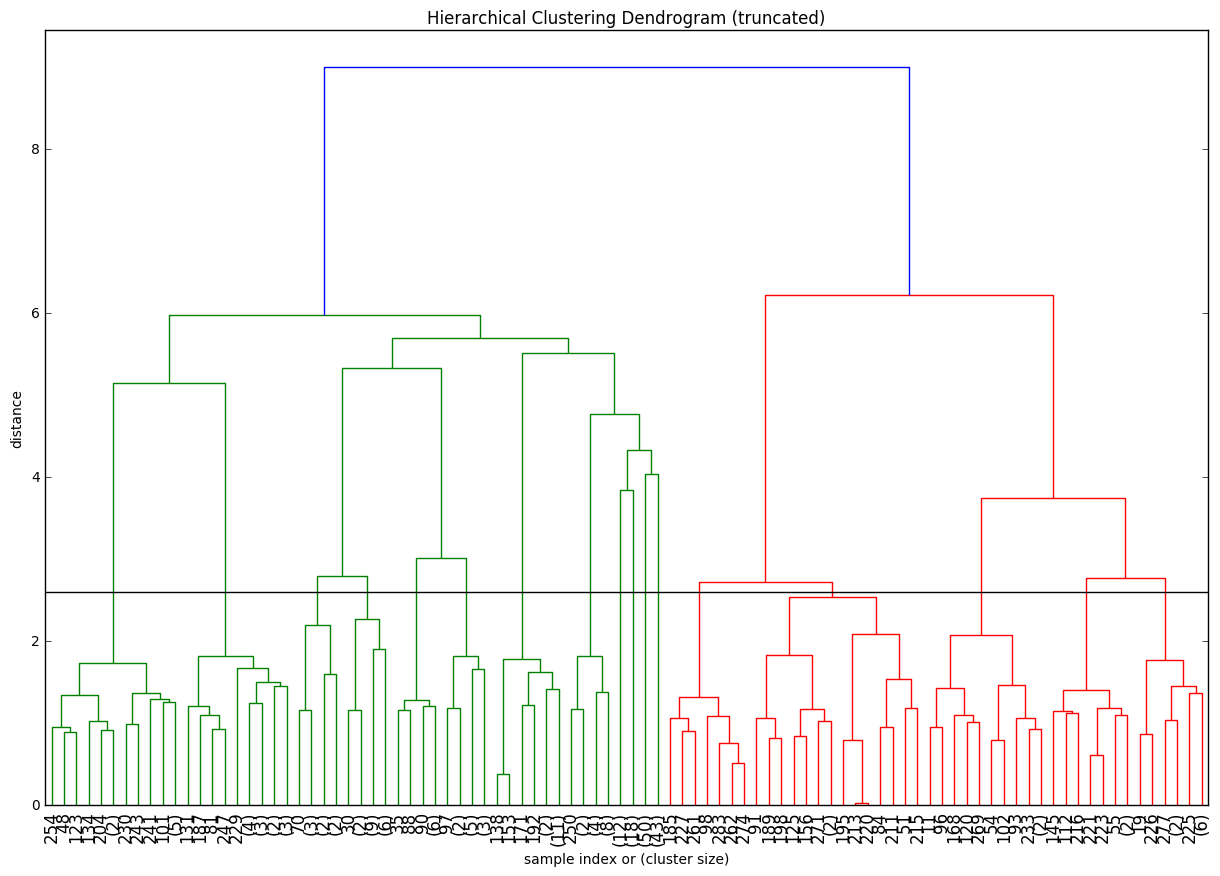

In [22]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

max_d1 = 2.6
plt.axhline(y=max_d1, c='k')

dendrogram(Z,     truncate_mode='level',  # show only the last p merged clusters
    p=6,  # show only the last p merged clusters
    leaf_rotation=90.,     leaf_font_size=12.,
    show_contracted=False,  # to get a distribution impression in truncated branches
    show_leaf_counts=True )
plt.show()

In [18]:
from scipy.cluster.hierarchy import inconsistent

depth = 3
incons = inconsistent(Z, depth)
print('\t      avg \t', '\tstd\t', '  count\t', 'inconsistency')
incons[-10:]

	      avg 	 	std	   count	 inconsistency


array([[ 106.69472929,   99.61019002,    7.        ,    2.09508451],
       [ 225.23752208,  137.46079614,    7.        ,    1.64173343],
       [ 279.646795  ,  146.96283146,    7.        ,    1.25779128],
       [ 237.3044993 ,  167.27500323,    7.        ,    2.05351956],
       [ 313.96829692,  218.08209755,    7.        ,    1.62067586],
       [ 254.20792204,  232.20382355,    7.        ,    2.1068912 ],
       [ 391.4751066 ,  309.11353896,    7.        ,    1.69462788],
       [ 420.93568976,  387.58624346,    7.        ,    1.91272676],
       [ 627.20613755,  428.73604346,    7.        ,    1.42888283],
       [ 961.54997795,  505.17069714,    7.        ,    1.7009157 ]])

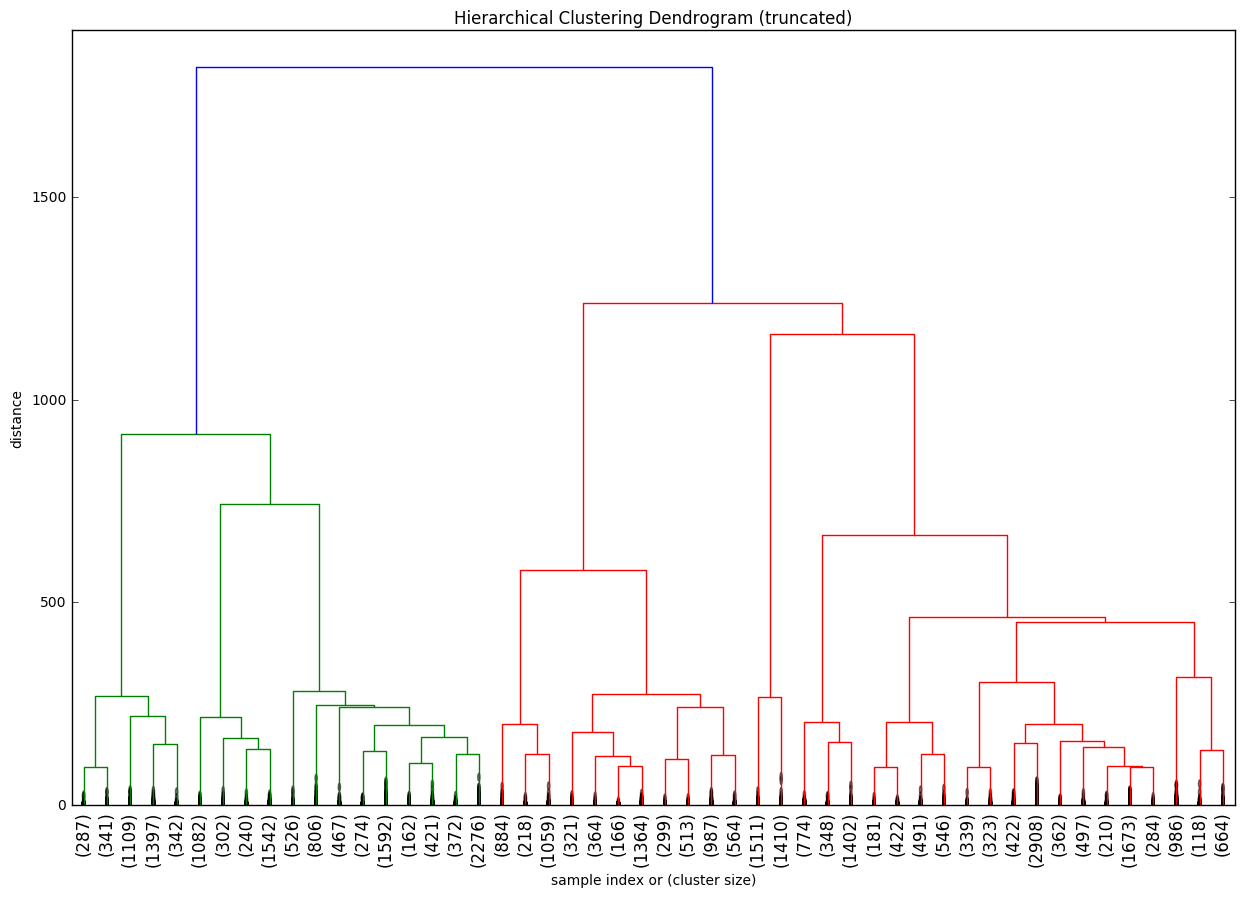

In [19]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=50,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()